In [2]:
#Install dependencies
#pip install tensorflow
#pip install tqdm
#pip install tflearn

#We are using Tflearn for building our conv-net and Tensorboard to compare different models.

In [3]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf

C:\Users\Aditya Gannavarapu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#For downloading data, https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
#Once it is done, extract it to have two folders, train and test

In [6]:
train_dir = 'G:/Data/train'
test_dir = 'G:/Data/test'
img_size = 100
lr = 1e-3

In [8]:
MODEL_NAME_TWO = 'dogsvcats-model'.format(lr, '2conv-CNN')
MODEL_NAME_SIX = 'dogsvscats-model-6-conv'.format(lr,'6conv-CNN')

In [ ]:
def label_img(img_path):
    label = img_path.split('.')[0]
    if label == 'cat': return [1,0]
    elif label == 'dog': return [0,1]

In [ ]:
def create_train_data():
    train_data = []
    for img in tqdm(os.listdir(train_dir)):
        img_label = label_img(img)
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        train_data.append([np.array(img),np.array(img_label)])
    shuffle(train_data)
    np.save('training_data.npy',train_data)
    return train_data
    

In [ ]:
def process_test_data():
    test_data = []
    for img in tqdm(os.listdir(test_dir)):
        img_num = img.split('.')[0]
        path = os.path.join(test_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        test_data.append([np.array(img),img_num])
    np.save('testing_data.npy',test_data)
    return test_data

In [4]:
#training_data = create_train_data()
#If you have already created the dataset:
train_data = np.load('training_data.npy')

In [ ]:
#Model 1 (With two conv layers)

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [7]:
#Model 2 (With six conv layers)

#Reset the graph before running another model
tf.reset_default_graph()

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)


convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [9]:
#Use this to reload a model which is partially trained, let's say you wanted 2000 epochs and only trained it for 1000.
#Save the model. Load it and train it.

if os.path.exists('{}.meta'.format(MODEL_NAME_SIX)):
    model.load(MODEL_NAME_SIX)
    print('model loaded!')

In [10]:
train = train_data[:-500]
test = train_data[-500:]
X = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
test_y = [i[1] for i in test]

In [11]:
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME_SIX)

Training Step: 3829  | total loss: 0.34661 | time: 378.128s
| Adam | epoch: 010 | loss: 0.34661 - acc: 0.8439 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.33282 | time: 380.650s
| Adam | epoch: 010 | loss: 0.33282 - acc: 0.8501 | val_loss: 0.51688 - val_acc: 0.7840 -- iter: 24500/24500
--


In [ ]:
#Tensorboard to check how the model is performing

#tensorboard --logdir=foo:G:\Data\log
# PATH is your project folder (Have a complete path for easy usage)

In [12]:
model.save(MODEL_NAME_SIX)

INFO:tensorflow:G:\Data\dogsvscats-model-6-conv is not in all_model_checkpoint_paths. Manually adding it.


In [13]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
test_data = np.load('testing_data.npy')

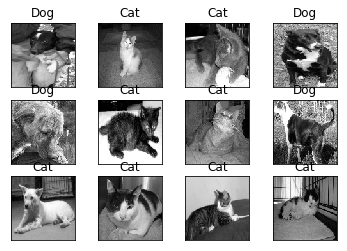

In [14]:
fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()